In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from tqdm import tqdm


from full_dynamics import FullSimulation

## Diverging Film Width

In [2]:
v_0 = 10.0
epsilons = np.linspace(4, 8, 201)


def asymmetry(arr):
    rho = arr[1:-1]
    return np.sum(np.abs(rho-np.roll(np.flip(rho), +1)))/np.sum(np.abs(rho+np.flip(rho)))
'''
forward_ASs = []

PW = FullSimulation(N_x=200, N_theta = 10, v_0 = 10, L_x = 5, epsilon = 4.0, hump_width=0.5)
PW.set_random(0.5, 0.01)
PW.evolve(100, show_progress=False)
prev_f_forward = np.copy(PW.f)
for epsilon in tqdm(epsilons):
    sim = FullSimulation(N_x=200, N_theta = 10, v_0 = 10, L_x = 5, epsilon = epsilon, hump_width=0.5)
    sim.set_custom_dist(prev_f_forward + 10**(-3) * (np.random.rand(200, 10)-0.5) * prev_f_forward)
    if epsilon > 5.0 and epsilon < 6.5:
        t_f = 200
    else:
        t_f = 20
    sim.evolve(t_f, show_progress=False)
    forward_ASs.append(asymmetry(sim.history_rho[-1]))
    prev_f_forward = np.copy(sim.f)

'''

'\nforward_ASs = []\n\nPW = FullSimulation(N_x=200, N_theta = 10, v_0 = 10, L_x = 5, epsilon = 4.0, hump_width=0.5)\nPW.set_random(0.5, 0.01)\nPW.evolve(100, show_progress=False)\nprev_f_forward = np.copy(PW.f)\nfor epsilon in tqdm(epsilons):\n    sim = FullSimulation(N_x=200, N_theta = 10, v_0 = 10, L_x = 5, epsilon = epsilon, hump_width=0.5)\n    sim.set_custom_dist(prev_f_forward + 10**(-3) * (np.random.rand(200, 10)-0.5) * prev_f_forward)\n    if epsilon > 5.0 and epsilon < 6.5:\n        t_f = 200\n    else:\n        t_f = 20\n    sim.evolve(t_f, show_progress=False)\n    forward_ASs.append(asymmetry(sim.history_rho[-1]))\n    prev_f_forward = np.copy(sim.f)\n\n'

In [3]:


'''
forward_Js = []

PW = FullSimulation(N_x=200, N_theta = 10, v_0 = 10, L_x = 5, epsilon = 4.0, hump_width=0.5)
PW.set_random(0.5, 0.01)
PW.evolve(100, show_progress=False)
prev_f_forward = np.copy(PW.f)
for epsilon in tqdm(epsilons):
    sim = FullSimulation(N_x=200, N_theta = 10, v_0 = 10, L_x = 5, epsilon = epsilon, hump_width=0.5)
    sim.set_custom_dist(prev_f_forward + 10**(-3) * (np.random.rand(200, 10)-0.5) * prev_f_forward)
    if epsilon > 5.0 and epsilon < 6.5:
        t_f = 200
    else:
        t_f = 20
    sim.evolve(t_f, show_progress=False)
    forward_Js.append(sim.history_Fx[-1])
    prev_f_forward = np.copy(sim.f)
'''


'\nforward_Js = []\n\nPW = FullSimulation(N_x=200, N_theta = 10, v_0 = 10, L_x = 5, epsilon = 4.0, hump_width=0.5)\nPW.set_random(0.5, 0.01)\nPW.evolve(100, show_progress=False)\nprev_f_forward = np.copy(PW.f)\nfor epsilon in tqdm(epsilons):\n    sim = FullSimulation(N_x=200, N_theta = 10, v_0 = 10, L_x = 5, epsilon = epsilon, hump_width=0.5)\n    sim.set_custom_dist(prev_f_forward + 10**(-3) * (np.random.rand(200, 10)-0.5) * prev_f_forward)\n    if epsilon > 5.0 and epsilon < 6.5:\n        t_f = 200\n    else:\n        t_f = 20\n    sim.evolve(t_f, show_progress=False)\n    forward_Js.append(sim.history_Fx[-1])\n    prev_f_forward = np.copy(sim.f)\n'

In [4]:
backward_ASs = []

'''
FW = FullSimulation(N_x=200, N_theta = 10, v_0 = 10, L_x = 5, epsilon = 8.0, hump_width=0.5)
FW.set_random(0.5, 0.01)
FW.evolve(100, show_progress=False)
prev_f_backward = np.copy(FW.f)
for epsilon in tqdm(np.flip(epsilons)):
    N_x = 200
    N_theta = 10
    sim = FullSimulation(N_x=N_x, N_theta = N_theta, v_0 = 10, L_x = 5, epsilon = epsilon, hump_width=0.5)

    new_dist = prev_f_backward
    new_dist += 10**(-3) * (np.random.rand(N_x, N_theta)-0.5) * new_dist
    #new_dist[N_x // 2:, :] -= 10**(-5) * np.random.rand(N_x - N_x // 2, N_theta) * new_dist[N_x // 2:, :]
    sim.set_custom_dist(new_dist)
    #print('done reset')
    if epsilon > 5.5 and epsilon <= 6.5:
        t_f = 500 ## to run
    else:
        t_f = 50
    sim.evolve(t_f, show_progress=False)
    backward_ASs.append(asymmetry(sim.history_rho[-1]))
    prev_f_backward = np.copy(sim.f)

np.savez('hyseresis_curves', forward_ASs = forward_ASs, backward_ASs = backward_ASs)
'''
data = np.load('data/hyseresis_curves.npz')
forward_ASs = data['forward_ASs']
backward_ASs = data['backward_ASs']

In [5]:
profiles = np.load('data/profiles_hysteresis2.npy')

def width(profile):
    if profile[200] <= profile[100]:
        profile = np.roll(np.flip(profile), +1)
    crossing_indices = np.where(np.diff(np.sign(profile - 0.25)))[0][0]
    #print(crossing_indices)
    first_max_index = np.argmax(profile[:100])
    #print(first_max_index)
    return (first_max_index - crossing_indices)*20/200 

widths2 = [width(profile) for profile in profiles]

In [6]:
profile_epsilons = np.linspace(4, 7, 80)

unique_widths, indices = np.unique(widths2, return_index=True)
last_indices = [len(widths2) - 1 - widths2[::-1].index(w) for w in unique_widths]

eps_err = profile_epsilons[last_indices] - profile_epsilons[indices]
mean_epsilon = (profile_epsilons[last_indices] + profile_epsilons[indices])/2


final_point = 7


In [7]:
'''
histories = []
for epsilon in tqdm(np.linspace(5.5, 7.0, 31)):
    figc_sim = FullSimulation(N_x=200, N_theta = 10, v_0 = 10, L_x = 5, epsilon = epsilon, hump_width=0.5)
    figc_sim.set_random(0.5, 0.01)
    figc_sim.evolve(100, show_progress=True)
    histories.append(figc_sim.history_rho)

histories = np.array(histories)

AS_histories = np.array([[asymmetry(h) for h in history] for history in histories])

np.savez('linear_instability', histories = histories, AS_histories = AS_histories, epsilon_vals = np.linspace(5.5, 7.0, 31))'''
data = np.load('data/linear_instability.npz')
histories = data['histories']
AS_histories = data['AS_histories']
epsilon_vals = data['epsilon_vals']
grads = [(h[400]-h[399])/h[399] * 10 for h in AS_histories]

<>:31: SyntaxWarning: invalid escape sequence '\z'
<>:31: SyntaxWarning: invalid escape sequence '\z'
/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_98865/3389687275.py:31: SyntaxWarning: invalid escape sequence '\z'
  axes[1].set_ylabel('Thin Film Width $\zeta^*$')
/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_98865/3389687275.py:16: RuntimeWarning: invalid value encountered in sqrt
  y = 0.355 * np.sqrt(6.01 - x)
/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_98865/3389687275.py:52: RuntimeWarning: invalid value encountered in log
  y = -1.6*np.log(6.095 - x) + 2.4


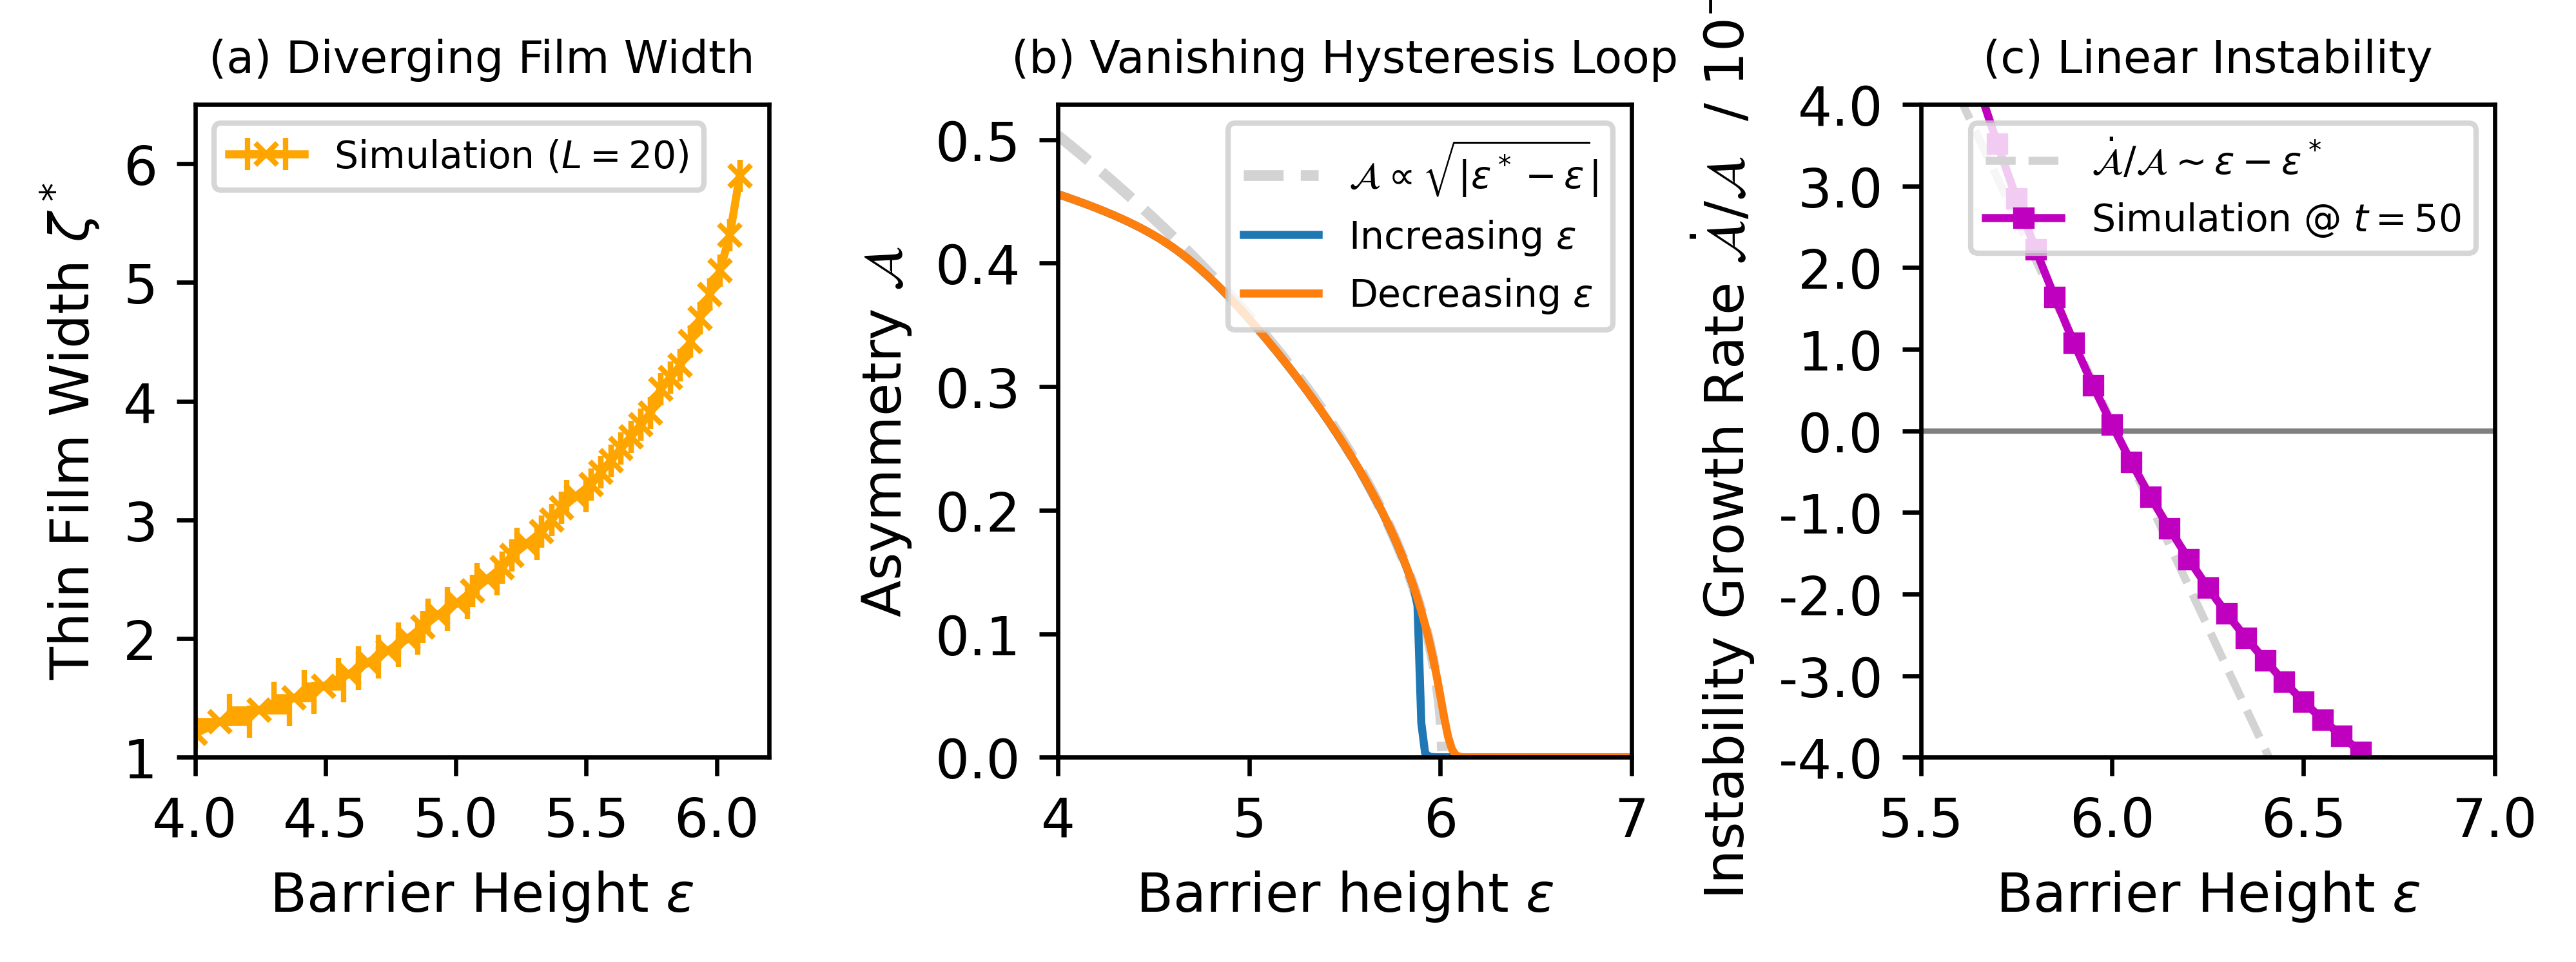

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(6.67, 2.5), dpi=600, width_ratios=[1.0, 1, 1])
plt.rcParams.update({'font.size': 7})

data = np.load('data/linear_instability.npz')
AS_histories = data['AS_histories']
epsilon_vals = data['epsilon_vals']



axes[0], axes[1] = axes[1], axes[0]
axes[0].set_title('(b) Vanishing Hysteresis Loop')
axes[0].set_ylabel(r'Asymmetry $\mathcal{A}$')
axes[0].set_xlabel(r'Barrier height $\epsilon$')

x = np.linspace(4.0, 8.0, 10000)
y = 0.355 * np.sqrt(6.01 - x)

axes[0].plot(x, y, label=r"$\mathcal{A} \propto \sqrt{|\epsilon^* - \epsilon}|$", linestyle = '--', color = 'lightgray', linewidth = 2.0)
axes[0].plot(np.flip(epsilons), backward_ASs, label=r"Increasing $\epsilon$", marker = 's', markersize = 0, linewidth=1.5)
axes[0].plot(epsilons, forward_ASs, label=r"Decreasing $\epsilon$", marker = '^', markersize = 0, linewidth=1.5)
axes[0].legend()
axes[0].set_xlim(4, 7)
axes[0].set_ylim(bottom = 0)
# Adding legends


final_point = 7
axes[1].errorbar(mean_epsilon[:-final_point], unique_widths[:-final_point], xerr=eps_err[:-final_point], marker='x', capsize=3, markersize=4, color='orange', label='Simulation ($L=20$)', linewidth=1.5)
axes[1].set_title('(a) Diverging Film Width')
axes[1].set_xlabel(r'Barrier Height $\epsilon$')
axes[1].set_ylabel('Thin Film Width $\zeta^*$')
axes[1].set_xlim(4, 6.2)

axes[2].set_title('(c) Linear Instability')
#axes[2].vlines(6.01, -0.004, 0.004, color='black', alpha=0.5, linewidth=1, label = r'$\epsilon^*$')
axes[2].set_xlabel(r'Barrier Height $\epsilon$')
axes[2].set_ylabel(r'Instability Growth Rate $\dot{\mathcal{A}}/\mathcal{A}$  / $10^{-2}$')
axes[2].set_yticks(np.linspace(-0.04, 0.04, 9))
axes[2].set_yticklabels(np.linspace(-4, 4, 9))
axes[2].hlines(0, 5.5, 7.0, color='black', alpha=0.5, linewidth=1)
axes[2].set_ylim(-0.04, 0.04)
axes[2].set_xlim(5.5, 7)
x = np.linspace(5.5, 7.0, 1000)
y = -(x - 6.01) * 0.1
axes[2].plot(x, y, color='lightgrey', linestyle='dashed', label = r'$\dot{\mathcal{A}}/\mathcal{A} \sim \epsilon - \epsilon^* $')
axes[2].plot(np.linspace(5.5, 7.0, 31), grads, marker='s', markersize=3, color='m', label=r'Simulation @ $t=50$')

axes[2].legend()


x = np.linspace(4, 6.2, 1000)
y = -1.6*np.log(6.095 - x) + 2.4
#axes[1].plot(x, y, linestyle='--', label = r'$\zeta^* \sim -\log(\epsilon^* - \epsilon)$', color='lightgrey')
axes[1].set_ylim(1, 6.5)
axes[1].legend()
#axes[1].vlines(6.095, 1, 6)
plt.tight_layout()
#plt.savefig('fig_critical.pdf', bbox_inches='tight')
plt.show()

<>:27: SyntaxWarning: invalid escape sequence '\z'
<>:27: SyntaxWarning: invalid escape sequence '\z'
/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_98865/204582897.py:27: SyntaxWarning: invalid escape sequence '\z'
  axes[1].set_ylabel('Thin Film Width $\zeta^*$')
/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_98865/204582897.py:2: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.2)  # Decrease horizontal padding between plots
/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_98865/204582897.py:3: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(wspace=0.2) #0.2) Decrease  # horizontal Decrease padding horizontal between padding plots between plots
/var/folders/3q/bs71m3ns1kq5sjlny3rn8t5r0000gn/T/ipykernel_98865/204

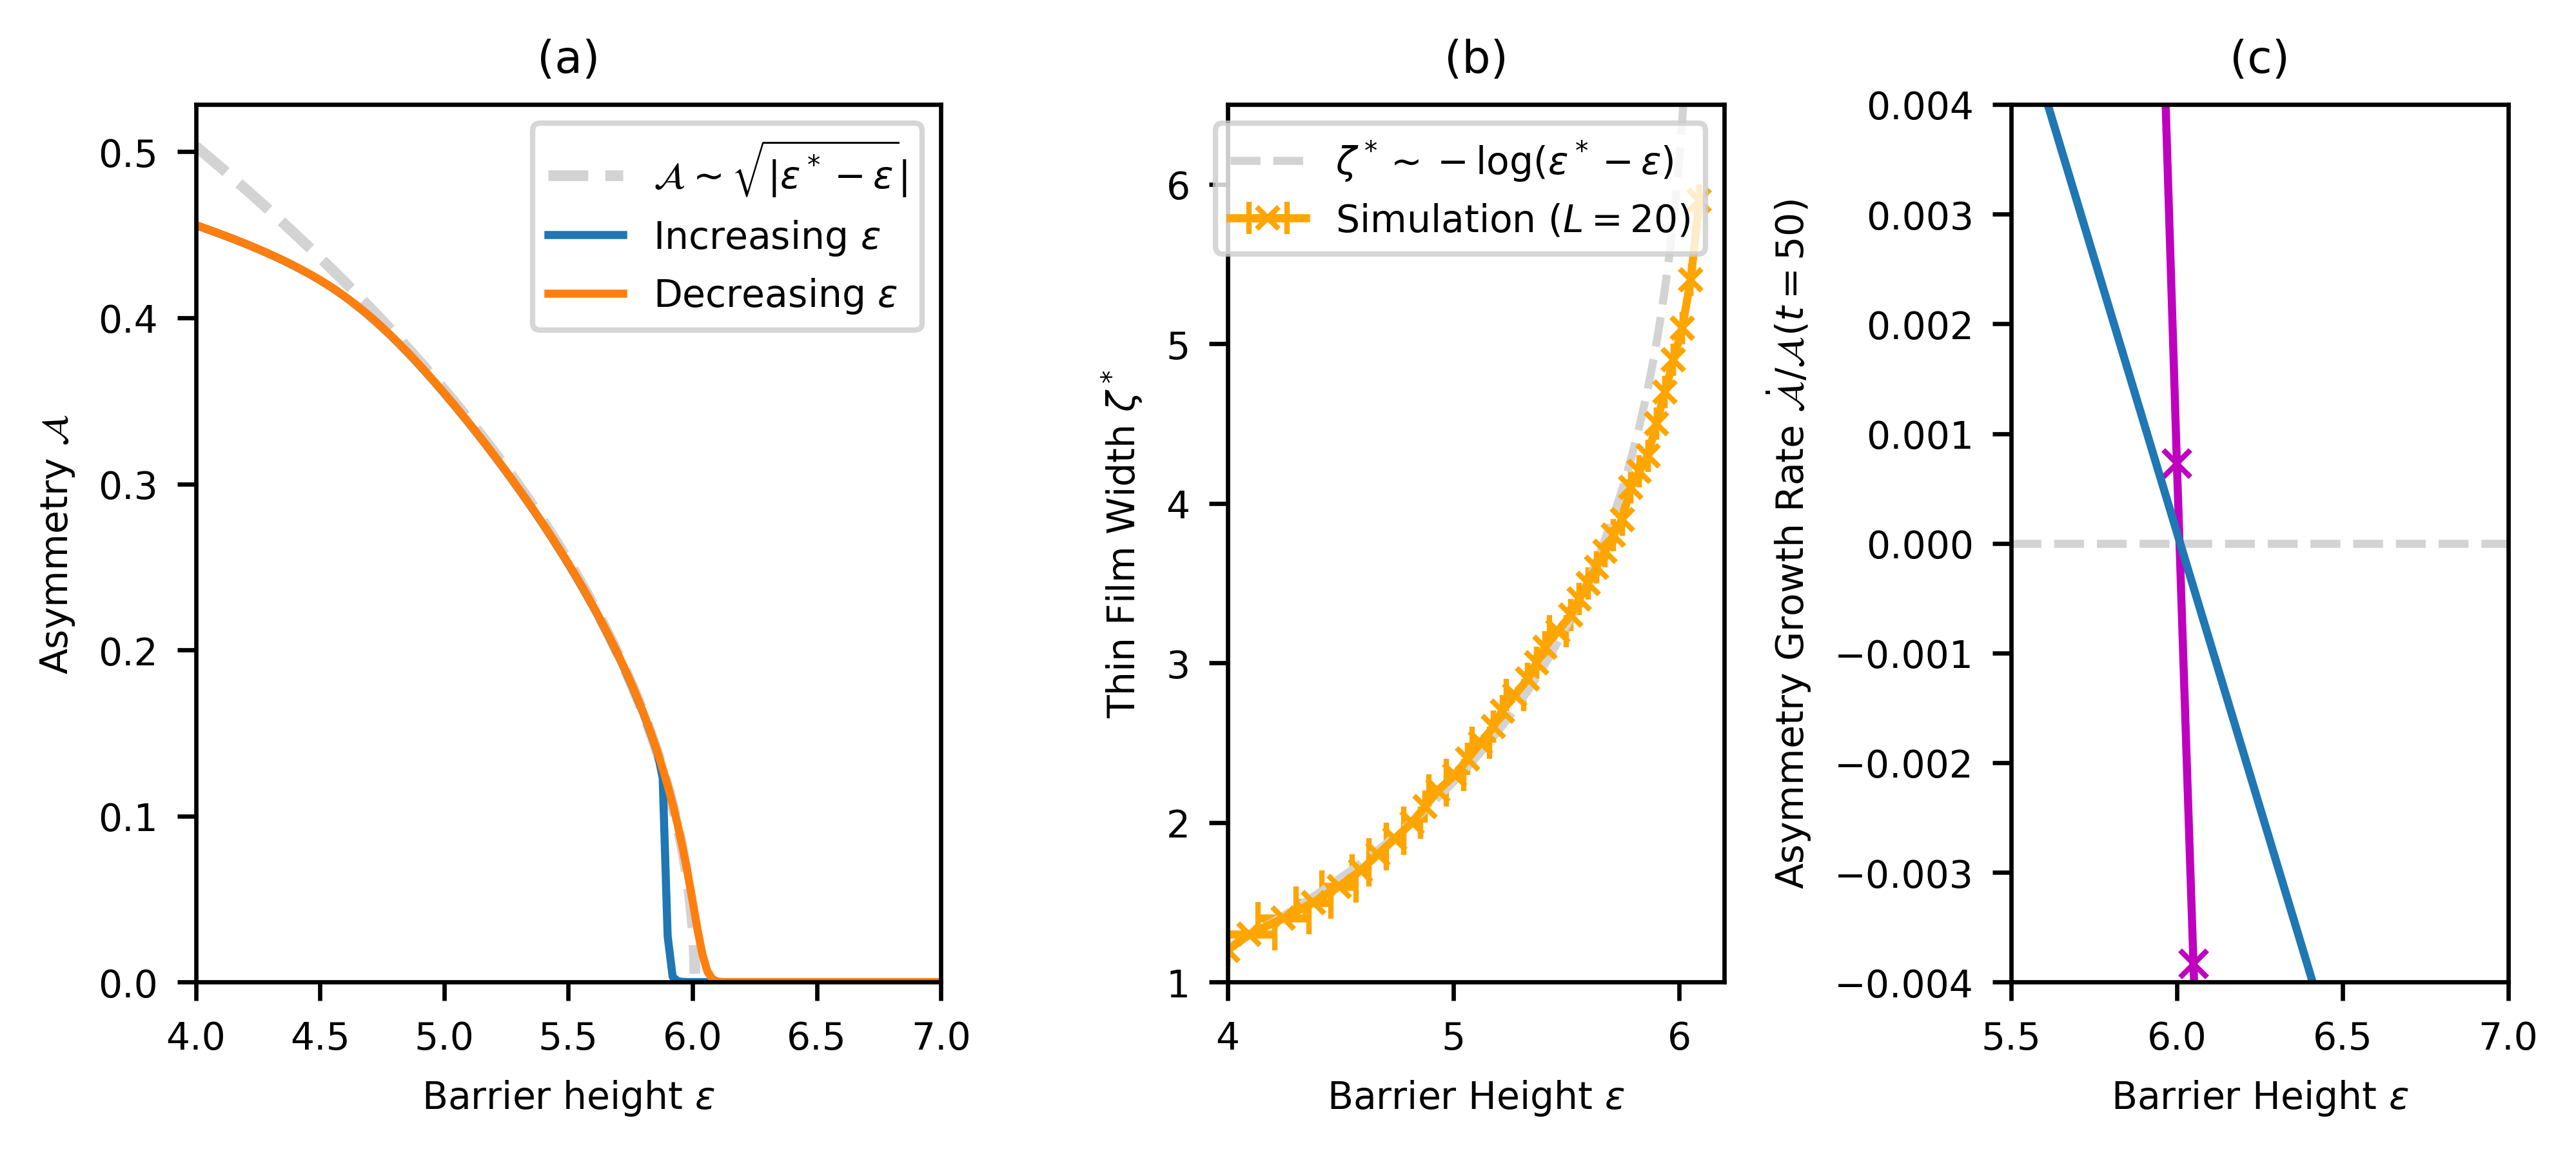

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(6.67, 3), dpi=600, width_ratios=[1.5, 1, 1], constrained_layout=True)
fig.subplots_adjust(wspace=0.2)  # Decrease horizontal padding between plots
fig.subplots_adjust(wspace=0.2) #0.2) Decrease  # horizontal Decrease padding horizontal between padding plots between plots
plt.rcParams.update({'font.size': 7})



axes[0].set_title('(a)')
axes[0].set_ylabel(r'Asymmetry $\mathcal{A}$')
axes[0].set_xlabel(r'Barrier height $\epsilon$')

x = np.linspace(4.0, 8.0, 10000)
y = 0.355 * np.sqrt(6.01 - x)

axes[0].plot(x, y, label=r"$\mathcal{A} \sim \sqrt{|\epsilon^* - \epsilon}|$", linestyle = '--', color = 'lightgray', linewidth = 2.0)
axes[0].plot(np.flip(epsilons), backward_ASs, label=r"Increasing $\epsilon$", marker = 's', markersize = 0, linewidth=1.5)
axes[0].plot(epsilons, forward_ASs, label=r"Decreasing $\epsilon$", marker = '^', markersize = 0, linewidth=1.5)
axes[0].legend()
axes[0].set_xlim(4, 7)
axes[0].set_ylim(bottom = 0)
# Adding legends

final_point = 7
axes[1].errorbar(mean_epsilon[:-final_point], unique_widths[:-final_point], xerr=eps_err[:-final_point], marker='x', capsize=3, markersize=4, color='orange', label='Simulation ($L=20$)')
axes[1].set_title('(b)')
axes[1].set_xlabel(r'Barrier Height $\epsilon$')
axes[1].set_ylabel('Thin Film Width $\zeta^*$')
axes[1].set_xlim(4, 6.2)

axes[2].set_title('(c)')
axes[2].set_xlabel(r'Barrier Height $\epsilon$')
axes[2].set_ylabel(r'Asymmetry Growth Rate $\dot{\mathcal{A}}/\mathcal{A}(t = 50)$')
axes[2].hlines(0, 5.5, 7.0, color='lightgrey', linestyle='dashed')
axes[2].plot(np.linspace(5.5, 7.0, 31), grads, marker='x', markersize=5, color='m')
axes[2].set_ylim(-0.004, 0.004)
axes[2].set_xlim(5.5, 7)
x = np.linspace(5.5, 7.0, 1000)
y = -(x - 6.01) * 0.01
axes[2].plot(x, y)

x = np.linspace(4, 6.2, 1000)
y = -1.6*np.log(6.095 - x) + 2.4
axes[1].plot(x, y, linestyle='--', label = r'$\zeta^* \sim -\log(\epsilon^* - \epsilon)$', color='lightgrey')
axes[1].set_ylim(1, 6.5)
axes[1].legend()
#axes[1].vlines(6.095, 1, 6)
plt.tight_layout()
plt.show()